In [1]:
import pandas as pd
database = pd.read_excel('database_TCC.xlsx')
database = database[['A','E','N','Tmax']]
database

,A,E,N,Tmax
0,25,1,11,67.67
1,25,1,5,126.85
2,25,2,8,72.71
3,25,3,11,162.85
4,25,3,5,94.85
5,35,1,8,61.15
6,35,2,11,63.03
7,35,2,5,77.35
8,35,3,8,63.25
9,25,1,8,76.30


In [2]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
standardscaler.fit(database)
data = standardscaler.transform(database)
database = pd.DataFrame(data,columns=database.columns)

In [7]:
import pickle
pickle.dump(standardscaler, open('standard_scaler_Tmax.pkl','wb'))

In [3]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,max_error

def split_x_and_y(database,x,y):
  dataset_x = database[x]
  dataset_y = database[y]
  return dataset_x,dataset_y


def scores(Y_true, Y_predicted):
  r2 = r2_score(Y_true, Y_predicted)
  meansquarederror = mean_squared_error(Y_true, Y_predicted)
  meanabsoluteerror = mean_absolute_error(Y_true, Y_predicted)
  maxerror = max_error(Y_true, Y_predicted)

  print('r2:',r2,'meansquarederror:',meansquarederror,'meanabsoluteerror:',meanabsoluteerror,'maxerror:',maxerror)
  return r2,meansquarederror,meanabsoluteerror,maxerror


# Random Forest Regressor

In [9]:
dataset_x,dataset_y = split_x_and_y(database,['A','E','N'],'Tmax')

In [10]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=1000)
RFR.fit(dataset_x,dataset_y)
RFR.score(dataset_x,dataset_y)

0.8447830391182938

In [11]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Tmax')

test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Tmax')

from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=3000,criterion='absolute_error',random_state=100)
RFR.fit(dataset_x,dataset_y)
RFR.score(test_x,test_y)

0.7053810307734065

In [5]:
RFR.feature_importances_

array([0.21169354, 0.38198803, 0.40631843])

In [12]:
import pickle
pickle.dump(RFR, open('Random_Forest_Regressor_Tmax.pkl', 'wb'))

# SVM

In [125]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Tmax')

test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Tmax')

from sklearn import svm
from sklearn.model_selection import GridSearchCV

svr = svm.SVR(C=4,kernel ='rbf',gamma='scale')

svr.fit(dataset_x,dataset_y)
svr.score(test_x,test_y)

0.6006148480401164

# MLP

In [17]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Tmax')

test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Tmax')

from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(max_iter=1000,hidden_layer_sizes=(64,32),activation='relu',solver='adam',learning_rate='constant',momentum=0.9,beta_1=0.6,beta_2=0.959,random_state = 100)
MLP.fit(dataset_x,dataset_y)
MLP.score(test_x,test_y)

0.830254490027388

# Polynomial with Linear

In [16]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Tmax')

test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Tmax')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(4)
LR = LinearRegression()

dataset_x_transformed = poly.fit_transform(dataset_x)
test_x_transformed = poly.fit_transform(test_x)

LR.fit(dataset_x_transformed,dataset_y)
LR.score(test_x_transformed,test_y)

0.2550390584768786

# Keras

In [88]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.python.keras.layers import Dense
import pandas as pd
from tensorflow.keras import layers

import keras
from keras.models import Sequential
from keras.layers import Dense

variables,results = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Tmax')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Tmax')

model = keras.Sequential([
  layers.Dense(32, activation='relu', input_shape=[len(variables.keys())]),
  layers.Dropout(0.3),
  layers.Dense(64, activation='relu'),
  # layers.Dense(256, activation='relu'),
  # layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

# optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

history = model.fit(variables.values,results.values,epochs=100,validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 1s 591ms/step - loss: 1.8846 - mse: 1.8846 - val_loss: 0.1420 - val_mse: 0.1420
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 2.2860 - mse: 2.2860 - val_loss: 0.1609 - val_mse: 0.1609
Epoch 3/100
1/1 [==============================] - 0s 43ms/step - loss: 2.3233 - mse: 2.3233 - val_loss: 0.1840 - val_mse: 0.1840
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 2.2541 - mse: 2.2541 - val_loss: 0.2051 - val_mse: 0.2051
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 2.3392 - mse: 2.3392 - val_loss: 0.2260 - val_mse: 0.2260
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 1.8813 - mse: 1.8813 - val_loss: 0.2459 - val_mse: 0.2459
Epoch 7/100
1/1 [==============================] - 0s 41ms/step - loss: 1.8183 - mse: 1.8183 - val_loss: 0.2649 - val_mse: 0.2649
Epoch 8/100
1/1 [==============================] - 0s 39ms/step - loss: 1.7107 - mse: 1.7

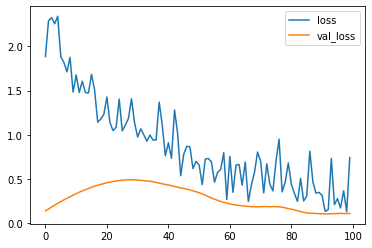

In [89]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

In [90]:
guess = model.predict(test_x.values)
desnormalizar = test_x.copy()
desnormalizar['Tmax'] = guess
desnormalizado_teste = standardscaler.inverse_transform(desnormalizar)
desnormalizado_teste

1/1 [==============================] - 0s 55ms/step


array([[ 25.        ,   1.        ,   8.        ,  94.7514009 ],
       [ 25.        ,   2.        ,   5.        , 102.71698042],
       [ 35.        ,   3.        ,  11.        ,  95.47709267]])

In [91]:
desnormalizar = test_x.copy()
desnormalizar['Tmax'] = test_y
desnormalizado_resultado = standardscaler.inverse_transform(desnormalizar)
desnormalizado_resultado

array([[25.  ,  1.  ,  8.  , 76.3 ],
       [25.  ,  2.  ,  5.  , 98.76],
       [35.  ,  3.  , 11.  , 94.7 ]])

In [395]:
scores(desnormalizado_resultado[:,-1],desnormalizado_teste[:,-1])

r2: 0.825284923165511 meansquarederror: 16.68519665631939 meanabsoluteerror: 3.659201678113812 maxerror: 5.168682866543691


(0.825284923165511, 16.68519665631939, 3.659201678113812, 5.168682866543691)

In [80]:
model.save("keras_model_Tmax.h5")